In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pwd

'/Users/olgabot/code/maca/notebooks'

In [43]:
import os

DATA_FOLDER = os.path.join('..', 'data')
FIGURE_FOLDER = os.path.join('..', 'figures')
! ls  -lha $DATA_FOLDER
! ls  -lha $FIGURE_FOLDER

total 0
drwxr-xr-x   5 olgabot  staff   170B Jul 20 16:20 .
drwxr-xr-x  15 olgabot  staff   510B Jul 20 16:24 ..
drwxr-xr-x   3 olgabot  staff   102B Jun 27 17:24 000_initial_analysis
drwxr-xr-x  17 olgabot  staff   578B Jun 27 21:21 005_bokeh_dimensionality_reduction
drwxr-xr-x   3 olgabot  staff   102B Jul 20 13:49 00_original
total 0
drwxr-xr-x   4 olgabot  staff   136B Jun 27 17:25 .
drwxr-xr-x  15 olgabot  staff   510B Jul 20 16:24 ..
drwxr-xr-x   2 olgabot  staff    68B Jun 27 17:24 000_initial_analysis
drwxr-xr-x   3 olgabot  staff   102B Jun 27 21:22 005_bokeh_dimensionality_reduction


In [6]:
input_folder = os.path.join(DATA_FOLDER, '00_original', 'gc_table_by_plates')
! ls -1 $input_folder/*log.csv

../data/00_original/gc_table_by_plates/MAA000014.log.csv
../data/00_original/gc_table_by_plates/MAA000072.log.csv
../data/00_original/gc_table_by_plates/MAA000077.log.csv
../data/00_original/gc_table_by_plates/MAA000089.log.csv
../data/00_original/gc_table_by_plates/MAA000093.log.csv
../data/00_original/gc_table_by_plates/MAA000094.log.csv
../data/00_original/gc_table_by_plates/MAA000099.log.csv
../data/00_original/gc_table_by_plates/MAA000107.log.csv
../data/00_original/gc_table_by_plates/MAA000140.log.csv
../data/00_original/gc_table_by_plates/MAA000144.log.csv
../data/00_original/gc_table_by_plates/MAA000145.log.csv
../data/00_original/gc_table_by_plates/MAA000157.log.csv
../data/00_original/gc_table_by_plates/MAA000199.log.csv
../data/00_original/gc_table_by_plates/MAA000200.log.csv
../data/00_original/gc_table_by_plates/MAA000204.log.csv
../data/00_original/gc_table_by_plates/MAA000205.log.csv
../data/00_original/gc_table_by_plates/MAA000226.log.csv
../data/00_original/gc_table_by

In [49]:
notebook_name = '006_look_at_other_plates'

figure_folder = os.path.join(FIGURE_FOLDER, notebook_name)
print('figure_folder:', os.path.abspath(figure_folder))
! mkdir -p $figure_folder

output_folder = os.path.join(DATA_FOLDER, notebook_name)
print('output_folder:', os.path.abspath(output_folder))
! mkdir -p $output_folder

figure_folder: /Users/olgabot/code/maca/figures/006_look_at_other_plates
output_folder: /Users/olgabot/code/maca/data/006_look_at_other_plates


In [7]:
!  wc -l $input_folder/MAA000014.* 

     311 ../data/00_original/gc_table_by_plates/MAA000014.htseq-count-by-cell.csv
   23442 ../data/00_original/gc_table_by_plates/MAA000014.htseq-count.csv
     311 ../data/00_original/gc_table_by_plates/MAA000014.log-by-cell.csv
      38 ../data/00_original/gc_table_by_plates/MAA000014.log.csv
   24102 total


In [9]:
import glob

globber = '*.htseq-count-by-cell.csv'

def combine_cell_files(folder, globber, verbose=False, **kwargs):
    dfs = []

    for filename in glob.iglob(os.path.join(folder, globber)):
        if verbose:
            print(f'Reading {filename} ...')
        df = pd.read_csv(filename, **kwargs)
        dfs.append(df)
    combined = pd.concat(dfs)
    return combined

counts = combine_cell_files(input_folder, globber, index_col=[0, 1, 2, 3])
print(counts.shape)
counts.head()

(6144, 23438)


,,,,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
SAMPLE_ID,EXP_ID,TAXON,WELL_MAPPING,,,,,,,,,,,,,,,,,,,,,
N902Barcode_707-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,0,315,183,23,0,4,0,0,0,1,...,0,79,8,0,0,83501,3581,0,0,135652
N902Barcode_711-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,0,6,0,0,0,0,0,0,0,5,...,0,0,0,0,0,16118,410,0,0,19416
N902Barcode_703-510,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,0,99,51,0,0,4,11,0,0,51,...,0,0,0,0,0,144624,1663,0,0,109335
N902Barcode_724-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,0,0,0,0,2,10,0,0,0,24,...,0,2,0,0,0,152181,855,0,0,89322
N902Barcode_710-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,0,89,51,0,1,12,0,0,0,16,...,0,4,0,0,0,119867,1373,0,0,105151


In [12]:
globber = '*.log-by-cell.csv'
mapping_stats = combine_cell_files(input_folder, globber, index_col=[0, 1, 2, 3])
print(mapping_stats.shape)
mapping_stats.head()

(6144, 34)


,,,,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Unnamed: 8,Number of input reads,Average input read length,UNIQUE READS:,Uniquely mapped reads number,Uniquely mapped reads %,...,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,UNMAPPED READS:,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,CHIMERIC READS:,Number of chimeric reads,% of chimeric reads
SAMPLE_ID,EXP_ID,TAXON,WELL_MAPPING,,,,,,,,,,,,,,,,,,,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,\tMay 30 23:21:26,\tMay 30 23:21:26,\tMay 30 23:21:34,23.15,NaN,51443,150,NaN,36514,\t70.98%,...,\t11.16%,3,\t0.01%,NaN,\t0.08%,\t17.78%,\t0.00%,NaN,0,\t0.00%
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,\tMay 30 23:29:22,\tMay 30 23:29:22,\tMay 30 23:29:25,3.38,NaN,2814,150,NaN,2173,\t77.22%,...,\t2.31%,0,\t0.00%,NaN,\t0.36%,\t20.11%,\t0.00%,NaN,0,\t0.00%
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,\tMay 30 23:25:04,\tMay 30 23:25:04,\tMay 30 23:25:19,159.19,NaN,663274,150,NaN,552353,\t83.28%,...,\t7.42%,358,\t0.05%,NaN,\t0.14%,\t8.99%,\t0.12%,NaN,0,\t0.00%
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,\tMay 30 23:13:35,\tMay 30 23:13:35,\tMay 30 23:13:53,158.07,NaN,790371,150,NaN,678577,\t85.86%,...,\t5.52%,387,\t0.05%,NaN,\t0.15%,\t8.35%,\t0.08%,NaN,0,\t0.00%
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,\tMay 30 23:17:10,\tMay 30 23:17:10,\tMay 30 23:17:27,142.21,NaN,671562,150,NaN,535213,\t79.70%,...,\t11.02%,456,\t0.07%,NaN,\t0.11%,\t9.01%,\t0.10%,NaN,0,\t0.00%


Remove all whitespace chars

In [14]:
mapping_stats = mapping_stats.applymap(lambda x: x.strip().strip('%') 
                                       if isinstance(x, str) else x)
print(mapping_stats.shape)
mapping_stats.head()

(6144, 34)


,,,,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Unnamed: 8,Number of input reads,Average input read length,UNIQUE READS:,Uniquely mapped reads number,Uniquely mapped reads %,...,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,UNMAPPED READS:,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,CHIMERIC READS:,Number of chimeric reads,% of chimeric reads
SAMPLE_ID,EXP_ID,TAXON,WELL_MAPPING,,,,,,,,,,,,,,,,,,,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:21:26,May 30 23:21:26,May 30 23:21:34,23.15,NaN,51443,150,NaN,36514,70.98,...,11.16,3,0.01,NaN,0.08,17.78,0.00,NaN,0,0.00
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:29:22,May 30 23:29:22,May 30 23:29:25,3.38,NaN,2814,150,NaN,2173,77.22,...,2.31,0,0.00,NaN,0.36,20.11,0.00,NaN,0,0.00
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:25:04,May 30 23:25:04,May 30 23:25:19,159.19,NaN,663274,150,NaN,552353,83.28,...,7.42,358,0.05,NaN,0.14,8.99,0.12,NaN,0,0.00
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:13:35,May 30 23:13:35,May 30 23:13:53,158.07,NaN,790371,150,NaN,678577,85.86,...,5.52,387,0.05,NaN,0.15,8.35,0.08,NaN,0,0.00
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:17:10,May 30 23:17:10,May 30 23:17:27,142.21,NaN,671562,150,NaN,535213,79.70,...,11.02,456,0.07,NaN,0.11,9.01,0.10,NaN,0,0.00


In [17]:
def maybe_to_numeric(series):
    try:
        return pd.to_numeric(series)
    except ValueError:
        return series

mapping_stats_numeric = mapping_stats.apply(maybe_to_numeric)
print(mapping_stats_numeric.shape)
mapping_stats_numeric.head()

(6144, 34)


,,,,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Unnamed: 8,Number of input reads,Average input read length,UNIQUE READS:,Uniquely mapped reads number,Uniquely mapped reads %,...,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,UNMAPPED READS:,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,CHIMERIC READS:,Number of chimeric reads,% of chimeric reads
SAMPLE_ID,EXP_ID,TAXON,WELL_MAPPING,,,,,,,,,,,,,,,,,,,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:21:26,May 30 23:21:26,May 30 23:21:34,23.15,NaN,51443,150,NaN,36514,70.98,...,11.16,3,0.01,NaN,0.08,17.78,0.00,NaN,0,0.0
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:29:22,May 30 23:29:22,May 30 23:29:25,3.38,NaN,2814,150,NaN,2173,77.22,...,2.31,0,0.00,NaN,0.36,20.11,0.00,NaN,0,0.0
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:25:04,May 30 23:25:04,May 30 23:25:19,159.19,NaN,663274,150,NaN,552353,83.28,...,7.42,358,0.05,NaN,0.14,8.99,0.12,NaN,0,0.0
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:13:35,May 30 23:13:35,May 30 23:13:53,158.07,NaN,790371,150,NaN,678577,85.86,...,5.52,387,0.05,NaN,0.15,8.35,0.08,NaN,0,0.0
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,May 30 23:17:10,May 30 23:17:10,May 30 23:17:27,142.21,NaN,671562,150,NaN,535213,79.70,...,11.02,456,0.07,NaN,0.11,9.01,0.10,NaN,0,0.0


In [20]:
cells = mapping_stats_numeric.index.to_frame()
print(cells.shape)
cells.head()

(6144, 4)


,,,,EXP_ID,SAMPLE_ID,TAXON,WELL_MAPPING
SAMPLE_ID,EXP_ID,TAXON,WELL_MAPPING,,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_706-518,mus,MAA000014
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_727-521,mus,MAA000014
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_711-508,mus,MAA000014
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_718-511,mus,MAA000014
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_720-507,mus,MAA000014


In [21]:
cells.apply(lambda x: len(x.unique()))

EXP_ID            16
SAMPLE_ID       6144
TAXON              1
WELL_MAPPING      19
dtype: int64

So can use the sample ID since its the same number of unique items as the number of rows

In [24]:
sample_ids = cells.index.droplevel([1, 2, 3])
len(sample_ids)

6144

In [25]:
cells.index = sample_ids
mapping_stats.index = sample_ids
counts.index= sample_ids

In [54]:
cells = cells.drop('SAMPLE_ID', axis=1)
print(cells.shape)
cells.head()

(6144, 3)


,EXP_ID,TAXON,WELL_MAPPING
SAMPLE_ID,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014


In [96]:
cells.query('WELL_MAPPING == "MAA000014"').index

Index(['N902Barcode_706-518', 'N902Barcode_727-521', 'N902Barcode_711-508',
       'N902Barcode_718-511', 'N902Barcode_720-507', 'N902Barcode_715-507',
       'N902Barcode_720-521', 'N902Barcode_729-510', 'N902Barcode_724-520',
       'N902Barcode_718-508',
       ...
       'N415Barcode_701-505', 'N415Barcode_718-513', 'N415Barcode_704-502',
       'N415Barcode_719-502', 'N415Barcode_716-503', 'N415Barcode_720-502',
       'N415Barcode_703-513', 'N415Barcode_719-503', 'N415Barcode_722-513',
       'N415Barcode_706-513'],
      dtype='object', name='SAMPLE_ID', length=310)

In [100]:
counts.groupby(cells['WELL_MAPPING']).groups['MAA000014']

Index(['N902Barcode_706-518', 'N902Barcode_727-521', 'N902Barcode_711-508',
       'N902Barcode_718-511', 'N902Barcode_720-507', 'N902Barcode_715-507',
       'N902Barcode_720-521', 'N902Barcode_729-510', 'N902Barcode_724-520',
       'N902Barcode_718-508',
       ...
       'N415Barcode_701-505', 'N415Barcode_718-513', 'N415Barcode_704-502',
       'N415Barcode_719-502', 'N415Barcode_716-503', 'N415Barcode_720-502',
       'N415Barcode_703-513', 'N415Barcode_719-503', 'N415Barcode_722-513',
       'N415Barcode_706-513'],
      dtype='object', name='SAMPLE_ID', length=310)

In [26]:
counts.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
N902Barcode_706-518,0,315,183,23,0,4,0,0,0,1,...,0,79,8,0,0,83501,3581,0,0,135652
N902Barcode_727-521,0,6,0,0,0,0,0,0,0,5,...,0,0,0,0,0,16118,410,0,0,19416
N902Barcode_711-508,0,99,51,0,0,4,11,0,0,51,...,0,0,0,0,0,144624,1663,0,0,109335
N902Barcode_718-511,0,0,0,0,2,10,0,0,0,24,...,0,2,0,0,0,152181,855,0,0,89322
N902Barcode_720-507,0,89,51,0,1,12,0,0,0,16,...,0,4,0,0,0,119867,1373,0,0,105151


In [27]:
cols = [x for x in counts if x.startswith('__')]
count_stats = counts[cols]
print(count_stats.shape)
count_stats.head()

(6144, 5)


,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
SAMPLE_ID,,,,,
N902Barcode_706-518,83501,3581,0,0,135652
N902Barcode_727-521,16118,410,0,0,19416
N902Barcode_711-508,144624,1663,0,0,109335
N902Barcode_718-511,152181,855,0,0,89322
N902Barcode_720-507,119867,1373,0,0,105151


In [61]:
count_stats['total_counts'] = counts.sum(axis=1)
print(count_stats.shape)
count_stats.head()

(6144, 6)


/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique,total_counts
SAMPLE_ID,,,,,,
N902Barcode_706-518,83501,3581,0,0,135652,1025835
N902Barcode_727-521,16118,410,0,0,19416,132352
N902Barcode_711-508,144624,1663,0,0,109335,781047
N902Barcode_718-511,152181,855,0,0,89322,506088
N902Barcode_720-507,119867,1373,0,0,105151,727434


In [62]:
(count_stats == 0).all()

__no_feature              False
__ambiguous               False
__too_low_aQual            True
__not_aligned              True
__alignment_not_unique    False
total_counts              False
dtype: bool

In [63]:
count_stats_nozero = count_stats.loc[:, ~(count_stats == 0).all()]
print(count_stats_nozero.shape)
count_stats_nozero.head()

(6144, 4)


,__no_feature,__ambiguous,__alignment_not_unique,total_counts
SAMPLE_ID,,,,
N902Barcode_706-518,83501,3581,135652,1025835
N902Barcode_727-521,16118,410,19416,132352
N902Barcode_711-508,144624,1663,109335,781047
N902Barcode_718-511,152181,855,89322,506088
N902Barcode_720-507,119867,1373,105151,727434


In [64]:
count_stats_tidy = count_stats_nozero.unstack().reset_index()
count_stats_tidy = count_stats_tidy.rename(columns={'level_0': 'htseq-count statistic', 
                                                    0: 'n_reads'})
print(count_stats_tidy.shape)
count_stats_tidy.head()

(24576, 3)


,htseq-count statistic,SAMPLE_ID,n_reads
0,__no_feature,N902Barcode_706-518,83501
1,__no_feature,N902Barcode_727-521,16118
2,__no_feature,N902Barcode_711-508,144624
3,__no_feature,N902Barcode_718-511,152181
4,__no_feature,N902Barcode_720-507,119867


In [65]:
count_stats_tidy['log10_n_reads'] = np.log10(count_stats_tidy['n_reads'] + 1)
count_stats_tidy.head()

,htseq-count statistic,SAMPLE_ID,n_reads,log10_n_reads
0,__no_feature,N902Barcode_706-518,83501,4.921697
1,__no_feature,N902Barcode_727-521,16118,4.207338
2,__no_feature,N902Barcode_711-508,144624,5.160243
3,__no_feature,N902Barcode_718-511,152181,5.182363
4,__no_feature,N902Barcode_720-507,119867,5.078703


In [66]:
count_stats_tidy_cells = count_stats_tidy.join(cells, on='SAMPLE_ID')
print(count_stats_tidy_cells.shape)
count_stats_tidy_cells.head()

(24576, 7)


,htseq-count statistic,SAMPLE_ID,n_reads,log10_n_reads,EXP_ID,TAXON,WELL_MAPPING
0,__no_feature,N902Barcode_706-518,83501,4.921697,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
1,__no_feature,N902Barcode_727-521,16118,4.207338,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
2,__no_feature,N902Barcode_711-508,144624,5.160243,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
3,__no_feature,N902Barcode_718-511,152181,5.182363,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
4,__no_feature,N902Barcode_720-507,119867,5.078703,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014


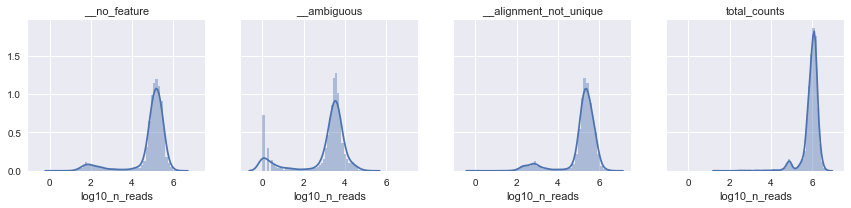

In [67]:
g = sns.FacetGrid(count_stats_tidy, col='htseq-count statistic')
g.map(sns.distplot, 'log10_n_reads')
g.set_titles('{col_name}')
pdf = os.path.join(figure_folder, 'htseq_count_statistics_distplot.pdf')
g.savefig(pdf)

In [80]:
sns.set(style='whitegrid', context='notebook')

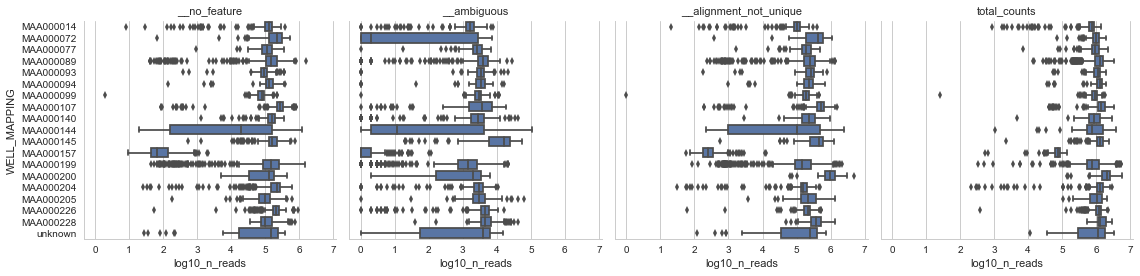

In [83]:
g = sns.FacetGrid(count_stats_tidy_cells, 
                  col='htseq-count statistic', size=4)
g.map(sns.boxplot, 'log10_n_reads', 'WELL_MAPPING')
g.set_titles('{col_name}')

pdf = os.path.join(figure_folder, 'htseq_count_statistics_violinplot.pdf')
g.savefig(pdf)

In [84]:
medians = count_stats_tidy_cells.groupby(['htseq-count statistic', 'WELL_MAPPING']).median()
medians

n_reads  log10_n_reads
htseq-count statistic  WELL_MAPPING                          
__alignment_not_unique MAA000014      106035.5       5.025453
                       MAA000072      424431.0       5.627808
                       MAA000077      194213.0       5.288281
                       MAA000089      248233.5       5.394862
                       MAA000093      264561.0       5.422527
                       MAA000094      235094.0       5.371243
                       MAA000099      193310.5       5.286256
                       MAA000107      536344.5       5.729444
                       MAA000140      238216.0       5.376972
                       MAA000144      106649.0       5.027923
                       MAA000145      455444.0       5.658436
                       MAA000157         242.0       2.385606
                       MAA000199      147922.0       5.170036
                       MAA000200      989179.0       5.995275
                       MAA000204      159267.0       5.202129
                       MAA000205      211392.0       5.325091
                       MAA000226      214157.0       5.330734
                       MAA000228      374434.0       5.573376
                       unknown        242291.5       5.384340
__ambiguous            MAA000014        1677.5       3.224921
                       MAA000072           1.0       0.301030
                       MAA000077        2654.0       3.424065
                       MAA000089        3986.0       3.600646
                       MAA000093        3395.0       3.530968
                       MAA000094        3441.0       3.536811
                       MAA000099        2969.0       3.472756
                       MAA000107        3620.0       3.558814
                       MAA000140        2881.5       3.459768
                       MAA000144          11.0       1.079181
                       MAA000145       16601.0       4.220160
...                                        ...            ...
__no_feature           MAA000140      157535.0       5.197380
                       MAA000144       19729.0       4.295127
                       MAA000145      162988.0       5.212158
                       MAA000157          64.5       1.816229
                       MAA000199      149605.0       5.174949
                       MAA000200      128648.0       5.109406
                       MAA000204      220186.0       5.342792
                       MAA000205       99698.0       4.998691
                       MAA000226      205153.5       5.312081
                       MAA000228       98775.0       4.994651
                       unknown        151000.5       5.178445
total_counts           MAA000014      739086.5       5.868696
                       MAA000072      979705.0       5.991096
                       MAA000077      945310.0       5.975575
                       MAA000089     1282982.0       6.108221
                       MAA000093     1106254.0       6.043855
                       MAA000094     1302065.0       6.114633
                       MAA000099      899965.5       5.954226
                       MAA000107     1413204.5       6.150202
                       MAA000140      837164.0       5.922811
                       MAA000144      764619.0       5.883444
                       MAA000145     1284817.0       6.108842
                       MAA000157       73825.5       4.868212
                       MAA000199      763128.0       5.882598
                       MAA000200     2045372.0       6.310773
                       MAA000204     1321940.0       6.121212
                       MAA000205     1033808.0       6.014440
                       MAA000226     1175382.0       6.070179
                       MAA000228     1318394.0       6.120046
                       unknown       1154780.5       6.060909

[76 rows x 2 columns]

In [78]:
medians.loc['total_counts']

,n_reads,log10_n_reads
WELL_MAPPING,,
MAA000014,739086.5,5.868696
MAA000072,979705.0,5.991096
MAA000077,945310.0,5.975575
MAA000089,1282982.0,6.108221
MAA000093,1106254.0,6.043855
MAA000094,1302065.0,6.114633
MAA000099,899965.5,5.954226
MAA000107,1413204.5,6.150202
MAA000140,837164.0,5.922811


In [87]:
medians_2d = medians.unstack().T
medians_2d.head()

htseq-count statistic  __alignment_not_unique  __ambiguous  __no_feature  \
        WELL_MAPPING                                                       
n_reads MAA000014                    106035.5       1677.5      130197.5   
        MAA000072                    424431.0          1.0      223585.0   
        MAA000077                    194213.0       2654.0      110340.0   
        MAA000089                    248233.5       3986.0      146291.5   
        MAA000093                    264561.0       3395.0       92894.0   

htseq-count statistic  total_counts  
        WELL_MAPPING                 
n_reads MAA000014          739086.5  
        MAA000072          979705.0  
        MAA000077          945310.0  
        MAA000089         1282982.0  
        MAA000093         1106254.0

In [88]:
medians_2d_log = medians_2d.loc['log10_n_reads']
medians_2d_log.head()

htseq-count statistic,__alignment_not_unique,__ambiguous,__no_feature,total_counts
WELL_MAPPING,,,,
MAA000014,5.025453,3.224921,5.114606,5.868696
MAA000072,5.627808,0.301030,5.349445,5.991096
MAA000077,5.288281,3.424065,5.042737,5.975575
MAA000089,5.394862,3.600646,5.165222,6.108221
MAA000093,5.422527,3.530968,4.967992,6.043855


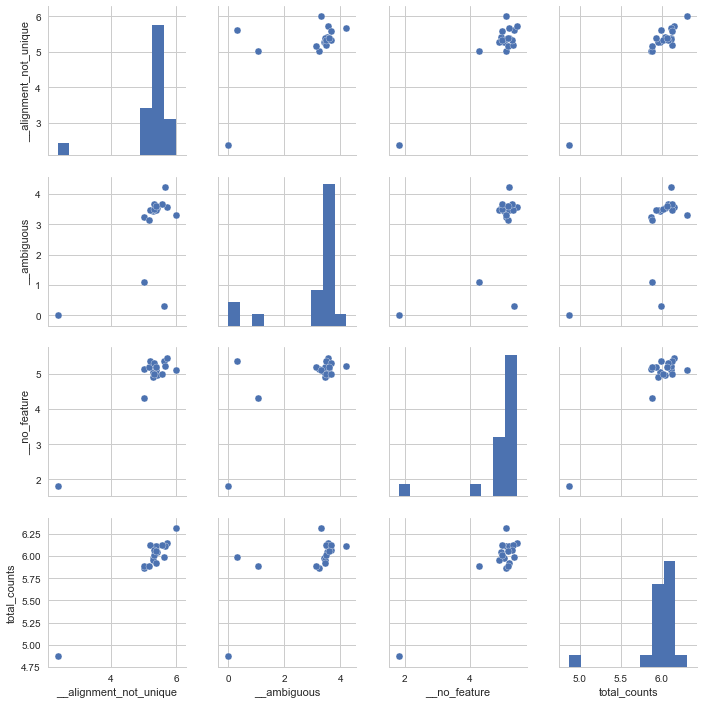

In [90]:
sns.pairplot(medians_2d_log)

In [91]:
cells.head()

,EXP_ID,TAXON,WELL_MAPPING
SAMPLE_ID,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,mus,MAA000014


In [94]:
cells.groupby('WELL_MAPPING').size()

WELL_MAPPING
MAA000014    310
MAA000072    339
MAA000077    351
MAA000089    672
MAA000093    275
MAA000094     93
MAA000099    342
MAA000107    318
MAA000140    290
MAA000144    528
MAA000145    335
MAA000157    216
MAA000199    643
MAA000200     69
MAA000204    307
MAA000205    327
MAA000226    346
MAA000228    351
unknown       32
dtype: int64

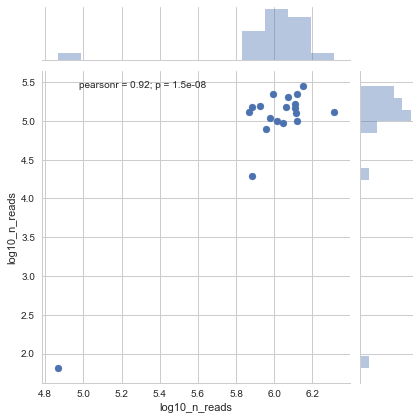

In [85]:
sns.jointplot(medians.loc['total_counts', 'log10_n_reads'], 
              medians.loc['__no_feature', 'log10_n_reads'])

In [28]:
cells_count_stats = pd.concat([cells, count_stats], axis=1)
print(cells_count_stats.shape)
cells_count_stats.head()

(6144, 9)


,EXP_ID,SAMPLE_ID,TAXON,WELL_MAPPING,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
SAMPLE_ID,,,,,,,,,
N902Barcode_706-518,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_706-518,mus,MAA000014,83501,3581,0,0,135652
N902Barcode_727-521,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_727-521,mus,MAA000014,16118,410,0,0,19416
N902Barcode_711-508,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_711-508,mus,MAA000014,144624,1663,0,0,109335
N902Barcode_718-511,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_718-511,mus,MAA000014,152181,855,0,0,89322
N902Barcode_720-507,170527_NB501961_0006_AHMJKFBGX2,N902Barcode_720-507,mus,MAA000014,119867,1373,0,0,105151
